In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Code Testing
---

## 1.1) Model 1: Coupled Spring Masses
---

### 1.1.1) Simulation Results

In [ ]:
%%bash
fname_res="../results/sim_spring_res.txt"

mass_building=10.0
mass_dampner=0.3

k_building=8.0
k_dampner=3.0

fr_building=0.2
fr_dampner=0.8

run_time=20.0

g++ -O3 -o sim_spring.exe ../src/sim_spring.cpp

./sim_spring.exe $fname_res $mass_building $mass_dampner $run_time

rm sim_spring.exe

In [ ]:
data_tmd = np.genfromtxt('../results/sim_spring_res.txt', dtype='f8', delimiter=',', usecols=[0,1,2,3])

data_range = np.linspace(0,10, len(data_tmd[:,0]))

fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)

ax1.plot(data_range, data_tmd[:,0], label='Building')
ax1.plot(data_range, data_tmd[:,2], label='Dampener')

ax1.legend()

ax1.set_title('Position of Spring Masses, Dampning')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Mass Position [m]')

### 1.1.2) Optimization Results

## 1.2) Model 2: Building
---

### 1.2.1) Simulation Results

In [96]:
%%bash
fname_init_conds="../init_conds/init_cond_build.txt"
fname_seis_data="../init_conds/elcentro_NS.dat.txt"
fname_damp_res="../results/sim_build_res_damp.txt"
fname_nodamp_res="../results/sim_build_res_nodamp.txt"

g++ -O3 -o sim_building.exe ../src/sim_building.cpp

./sim_building.exe $fname_init_conds $fname_seis_data $fname_damp_res
./sim_building.exe $fname_init_conds $fname_seis_data $fname_nodamp_res 0.0005

rm sim_building.exe

In [97]:
quake_data = np.genfromtxt('../init_conds/elcentro_NS.dat.txt', delimiter=' ', usecols=(0,1), dtype='f8')

data_damp = np.genfromtxt('../results/sim_build_res_damp.txt', delimiter=',', skip_header=1, dtype='f8')
data_no_damp = np.genfromtxt('../results/sim_build_res_nodamp.txt', delimiter=',', skip_header=1, dtype='f8')

data_damp = data_damp[:,:-1]
data_no_damp = data_no_damp[:,:-1]

Text(0.5, 1.0, 'Force Applied On The Ground Floor Over Time')

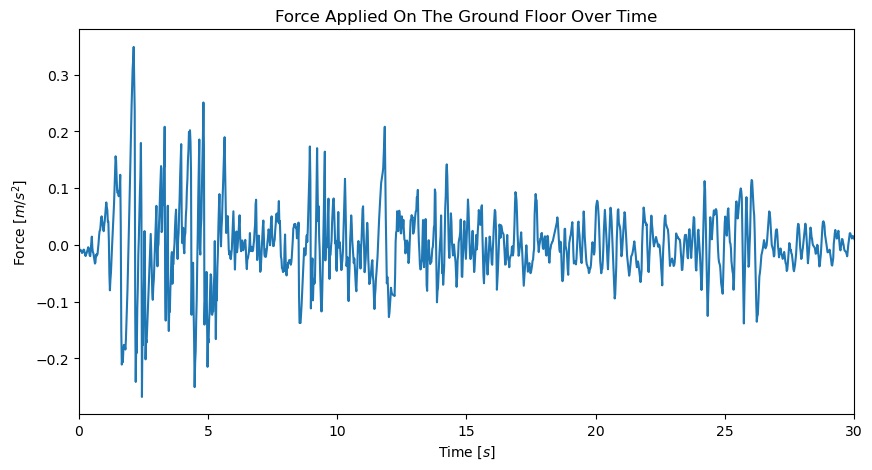

In [98]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)

# plot input seismic signal/data
ax1.plot(quake_data[:,0], quake_data[:,1])

ax1.set_xlim(0,30)

ax1.set_xlabel('Time [$s$]')
ax1.set_ylabel('Force [$m/s^{2}$]')
ax1.set_title('Force Applied On The Ground Floor Over Time')

Text(0.5, 1.0, '1D Displacement Of Each Floor')

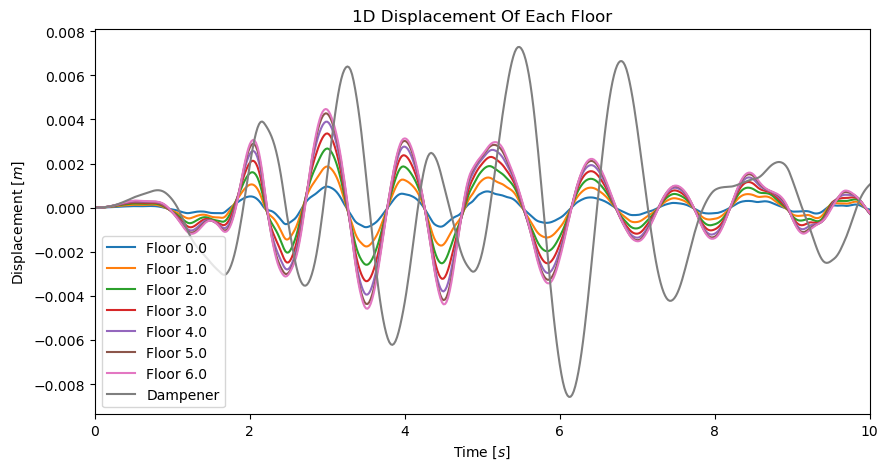

In [99]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)

# plot floor displacement
for i in range(len(data_damp[0])-2):
    if (i%2 == 0):
        ax1.plot(quake_data[:,0], data_damp[:,i], label=f'Floor {i/2}')

ax1.plot(quake_data[:,0], data_damp[:,len(data_damp[0])-2], label='Dampener')

ax1.set_xlim(0,10)

ax1.legend()

ax1.set_xlabel('Time [$s$]')
ax1.set_ylabel('Displacement [$m$]')
ax1.set_title('1D Displacement Of Each Floor')

Text(0.5, 1.0, '1D Displacement Of Each Floor')

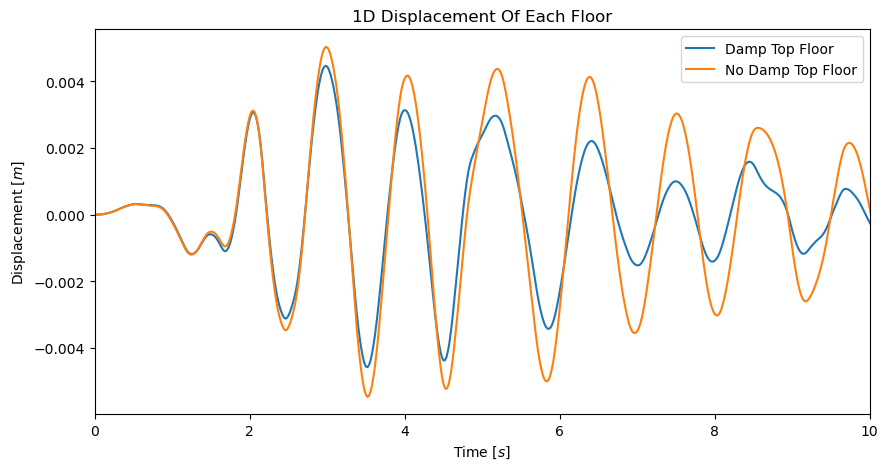

In [100]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)

# plot floor displacement

ax1.plot(quake_data[:,0], data_damp[:,len(data_damp[0])-4], label=f'Damp Top Floor')
ax1.plot(quake_data[:,0], data_no_damp[:,len(data_no_damp[0])-4], label=f'No Damp Top Floor')

ax1.set_xlim(0,10)

ax1.legend()

ax1.set_xlabel('Time [$s$]')
ax1.set_ylabel('Displacement [$m$]')
ax1.set_title('1D Displacement Of Each Floor')

### 1.2.2) Optimization Results